In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
from particles import resampling as rs
import time
import importlib
import sys
sys.path.append('..')

In [8]:
w1_ula = np.array([np.loadtxt("w1_ula20.txt"), np.loadtxt("w1_ula20b.txt"), np.loadtxt("w1_ula20c.txt"), np.loadtxt("w1_ula20d.txt"), np.loadtxt("w1_ula20e.txt")])
w1_mala = np.array([np.loadtxt("w1_mala20.txt"), np.loadtxt("w1_mala20b.txt"), np.loadtxt("w1_mala20c.txt"), np.loadtxt("w1_mala20d.txt"), np.loadtxt("w1_mala20e.txt")])
w1_fr = np.array([np.loadtxt("w1_fr20.txt"), np.loadtxt("w1_fr20b.txt"), np.loadtxt("w1_fr20c.txt"), np.loadtxt("w1_fr20d.txt"), np.loadtxt("w1_fr20e.txt")])
w1_wfr = np.array([np.loadtxt("w1_wfr20.txt"), np.loadtxt("w1_wfr20b.txt"), np.loadtxt("w1_wfr20c.txt"), np.loadtxt("w1_wfr20d.txt"), np.loadtxt("w1_wfr20e.txt")])
w1_smcula = np.array([np.loadtxt("w1_smcula20.txt"), np.loadtxt("w1_smcula20b.txt"), np.loadtxt("w1_smcula20c.txt"), np.loadtxt("w1_smcula20d.txt"), np.loadtxt("w1_smcula20e.txt")])
w1_smcmala = np.array([np.loadtxt("w1_smcmala20.txt"), np.loadtxt("w1_smcmala20b.txt"), np.loadtxt("w1_smcmala20c.txt"), np.loadtxt("w1_smcmala20d.txt"), np.loadtxt("w1_smcmala20e.txt")])

In [9]:
Niter = 1000
Niter_ula = 4*Niter
Niter_mala = 4*Niter
Niter_fr = 4*Niter
Niter_smcula = 4*Niter
Niter_smcmala = 4*Niter

In [15]:
tmp = np.array([np.loadtxt("times20.txt"), np.loadtxt("times20b.txt"), np.loadtxt("times20c.txt"), np.loadtxt("times20d.txt"), np.loadtxt("times20e.txt")])

In [17]:
avg_runtime = np.mean(tmp, axis = 0)

In [18]:
xx_ula = avg_runtime[0]/Niter_ula*np.arange(Niter_ula)
xx_mala = avg_runtime[1]/Niter_mala*np.arange(Niter_mala)
xx_fr = avg_runtime[2]/Niter_fr*np.arange(Niter_fr)
xx_wfr = avg_runtime[3]/Niter*np.arange(Niter)
xx_smcula = avg_runtime[4]/Niter_smcula*np.arange(Niter_smcula)
xx_smcmala = avg_runtime[5]/Niter_smcmala*np.arange(Niter_smcmala)

In [26]:
w1_ula_plot = np.mean(w1_ula, axis = (0, 1))
w1_mala_plot = np.mean(w1_mala, axis = (0, 1))
w1_fr_plot = np.mean(w1_fr, axis = (0, 1))
w1_wfr_plot = np.mean(w1_wfr, axis = (0, 1))
w1_smcula_plot = np.mean(w1_smcula, axis = (0, 1))
w1_smcmala_plot = np.mean(w1_smcmala, axis = (0, 1))

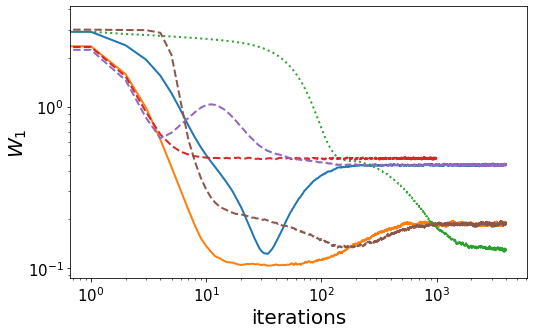

In [30]:
plt.figure(figsize = (18,5))
plt.subplot(1, 2, 1)
plt.loglog(w1_ula_plot, label = 'ULA', lw = 2)
plt.plot(w1_mala_plot, label = 'MALA', lw = 2)
plt.plot(w1_fr_plot, label = 'SMC-tempering', lw = 2, linestyle = 'dotted')
plt.plot(w1_wfr_plot, label = 'SMC-WFR', lw = 2, linestyle = 'dashed')
plt.plot(w1_smcula_plot, label = 'SMC-ULA', lw = 2, linestyle = 'dashed')
plt.plot(w1_smcmala_plot, label = 'SMC-MALA', lw = 2, linestyle = 'dashed')
plt.xlabel('iterations', fontsize = 20)
plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# # legend = plt.legend(loc = 'lower center', bbox_to_anchor=(1, -0.5), ncol = 6, fontsize = 20)
# plt.subplot(1, 2, 2)
# plt.loglog(np.mean(mmd_ula, axis = 0), lw = 2)
# plt.plot(np.mean(mmd_mala, axis = 0), lw = 2)
# plt.plot(np.mean(mmd_fr, axis = 0), lw = 2, linestyle = 'dotted')
# plt.plot(np.mean(mmd_wfr, axis = 0), lw = 2, linestyle = 'dashed')
# plt.plot(np.mean(mmd_smcula, axis = 0), lw = 2, linestyle = 'dashed')
# plt.plot(np.mean(mmd_smcmala, axis = 0), lw = 2, linestyle = 'dashed')
# plt.xlabel('iterations', fontsize = 20)
# plt.ylabel('MMD', fontsize = 20, labelpad=-1)
# plt.xticks(fontsize=15);
# plt.yticks(fontsize=15);
# plt.savefig('conv_iter_gm20.pdf', bbox_inches="tight")

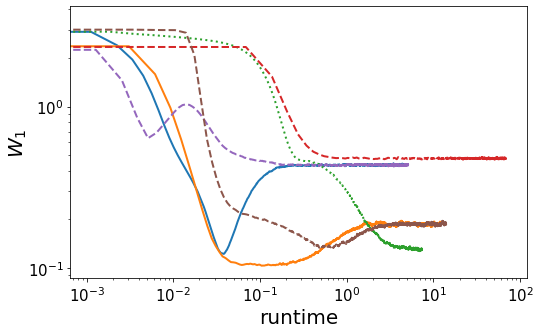

In [29]:
plt.figure(figsize = (18,5))
plt.subplot(1, 2, 1)
plt.loglog(xx_ula, w1_ula_plot, label = 'ULA', lw = 2)
plt.plot(xx_mala, w1_mala_plot, label = 'MALA', lw = 2)
plt.plot(xx_fr, w1_fr_plot, label = 'SMC-tempering', lw = 2, linestyle = 'dotted')
plt.plot(xx_wfr, w1_wfr_plot, label = 'SMC-WFR', lw = 2, linestyle = 'dashed')
plt.plot(xx_smcula, w1_smcula_plot, label = 'SMC-ULA', lw = 2, linestyle = 'dashed')
plt.plot(xx_smcmala, w1_smcmala_plot, label = 'SMC-MALA', lw = 2, linestyle = 'dashed')
plt.xlabel('runtime', fontsize = 20)
plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# plt.subplot(1, 2, 2)
# plt.loglog(xx_ula, np.mean(mmd_ula, axis = 0), lw = 2)
# plt.plot(xx_mala, np.mean(mmd_mala, axis = 0), lw = 2)
# plt.plot(xx_fr, np.mean(mmd_fr, axis = 0), lw = 2, linestyle = 'dotted')
# plt.plot(xx_wfr, np.mean(mmd_wfr, axis = 0), lw = 2, linestyle = 'dashed')
# plt.plot(xx_smcula, np.mean(mmd_smcula, axis = 0), lw = 2, linestyle = 'dashed')
# plt.plot(xx_smcmala, np.mean(mmd_smcmala, axis = 0), lw = 2, linestyle = 'dashed')
# plt.xlabel('runtime', fontsize = 20)
# plt.ylabel('MMD', fontsize = 20, labelpad=-1)
# plt.xticks(fontsize=15);
# plt.yticks(fontsize=15);
# plt.savefig('conv_runtime_gm20.pdf', bbox_inches="tight")